In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import sys
import cv2
import imageio as io
from tqdm.notebook import tqdm
from keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from keras.applications.vgg16 import preprocess_input

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import PIL

import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Rescaling
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
def autoencoder_model():
    # Encoder
    model = Sequential(name='Convolutional_AutoEncoder_Model')
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1), padding='same',
                     name='Encoding_Conv2D_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_1'))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', name='Encoding_Conv2D_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_3'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_4'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='Encoding_MaxPooling2D_4'))
    #model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_5'))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
#togliere maxpooling, mettere average pooling alla fine solamente, mettere stride 2 nel conv2d
    # Decoder
    #model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_1'))
    #model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_1'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_2'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_3'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_3'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_4'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_4'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_5'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_5'))
    model.add(Conv2D(1, kernel_size=(3, 3), padding='same', activation='sigmoid', name='Decoding_Output'))
    return model

In [ ]:
#model=autoencoder_model()
#model.summary()

In [ ]:
def data_loader(directory):
  img_list = []
  lab_list = []
  for img in tqdm(os.listdir(directory)):
    lab_list.append(img)
    img = tf.keras.utils.load_img(directory+img, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr /=255
    img_list.append(img_arr)

  return img_list, lab_list

def display_img(file):
  plt.imshow(file[:,:,0], cmap='gray')

def load_image2(directory, file_name):
  file_path = directory+file_name
  img = tf.keras.utils.load_img(file_path, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
  img = tf.keras.utils.img_to_array(img)
  img /=255
  return img


In [ ]:
def data_loader2(folder):
  img_list = []
  lab_list = []
  for f in tqdm(os.listdir(folder)):
    f = os.path.join(folder, f)
    f = f + '/'
    for img in tqdm(os.listdir(f)):
      lab_list.append(f+img)
      img = tf.keras.utils.load_img(f+img, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
      img_arr = tf.keras.utils.img_to_array(img)
      img_arr /=255
      img_list.append(img_arr)

  return img_list, lab_list


In [ ]:
#image_path = 'dataset/augmented/n01443537(goldfish)/'
image_path = 'dataset_27k/'
dataset_file, dataset_label= data_loader2(image_path)
dataset_file = np.asarray(dataset_file)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4863 [00:00<?, ?it/s]

  0%|          | 0/2623 [00:00<?, ?it/s]

  0%|          | 0/1446 [00:00<?, ?it/s]

  0%|          | 0/2112 [00:00<?, ?it/s]

  0%|          | 0/3098 [00:00<?, ?it/s]

  0%|          | 0/1668 [00:00<?, ?it/s]

  0%|          | 0/1866 [00:00<?, ?it/s]

  0%|          | 0/1820 [00:00<?, ?it/s]

  0%|          | 0/4821 [00:00<?, ?it/s]

  0%|          | 0/1862 [00:00<?, ?it/s]

In [ ]:
print(dataset_file.shape)
train_data, test_data, train_label, test_label = train_test_split(dataset_file, dataset_label, test_size = 0.2)
print(len(train_data),len(test_data))

(26179, 128, 128, 1)
20943 5236


In [ ]:
np.save('/content/drive/MyDrive/array/train_data',train_data)

In [ ]:
np.save('/content/drive/MyDrive/array/test_data',test_data)

In [ ]:
np.save('/content/drive/MyDrive/array/train_label',train_label)
np.save('/content/drive/MyDrive/array/test_label',test_label)

In [ ]:
train_data = np.load('/content/drive/MyDrive/array/train_data.npy')
test_data = np.load('/content/drive/MyDrive/array/test_data.npy')
train_label = np.load('/content/drive/MyDrive/array/train_label.npy')
test_label = np.load('/content/drive/MyDrive/array/test_label.npy')

dataset_27k/gatto/1467.jpeg


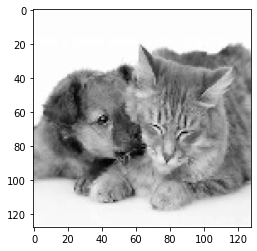

In [ ]:
display_img(train_data[100])
print(train_label[100])

In [ ]:
model=autoencoder_model()
model.compile(optimizer='Adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=6,min_delta=0.0001) 
checkpoint = ModelCheckpoint('/content/drive/My Drive/n+2_prova.h5', monitor='val_loss', mode='min', save_best_only=True) 
model.fit(train_data, train_data, epochs=30, batch_size=64, validation_data=(test_data,test_data), callbacks=[early_stopping,checkpoint])

Epoch 1/30
283/328 [========================>.....] - ETA: 14s - loss: 0.0252

KeyboardInterrupt: ignored

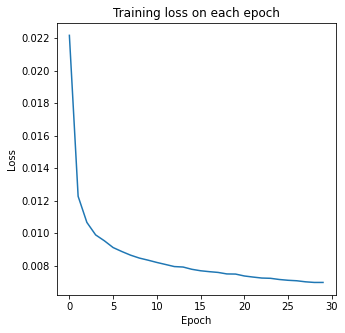

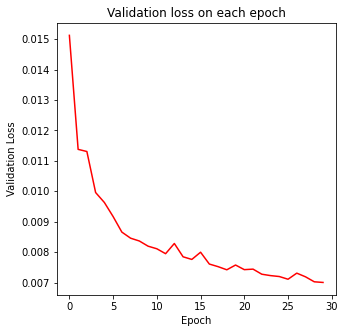

In [ ]:
plt.figure(figsize=(5,5))
epochs = [i for i in range(30)]
plt.plot(epochs,model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss on each epoch')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epochs,model.history.history['val_loss'],color='r')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation loss on each epoch')
plt.show()

In [ ]:
model = load_model("/content/drive/My Drive/n+1_prova.h5")
#model.compile(optimizer='Adam', loss='mse') 

In [ ]:
#model.summary()

In [ ]:
#history = model.history.history
sample_image = train_data[4]
sample_image = np.expand_dims(sample_image,axis=0)
image2 = model.predict(sample_image)
display_img(train_data[4])


NameError: ignored

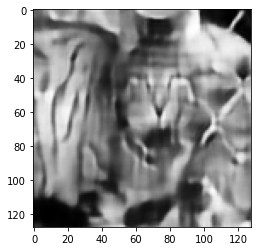

In [ ]:
display_img(image2[0])

In [ ]:
from keras import backend as K
def feature_extraction(model, data, layer = 5):

    encoded = K.function([model.layers[0].input],[model.layers[layer].output])
    encoded_array = encoded([data])[0]
    #pooled_array = encoded_array.max(axis=-1)
    return encoded_array


In [ ]:
gallery_path = '/content/drive/MyDrive/dataset/validation/gallery/'
query_path = '/content/drive/MyDrive/dataset/validation/query/'

gallery_data, gallery_label = data_loader2(gallery_path)
query_data, query_label = data_loader2(query_path)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
gallery_data = np.asarray(gallery_data)
query_data = np.asarray(query_data)

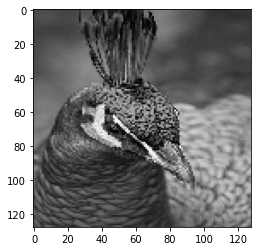

In [ ]:
sample_image = gallery_data[302]
sample_image = np.expand_dims(sample_image,axis=0)
image2 = model.predict(sample_image)
display_img(gallery_data[302])

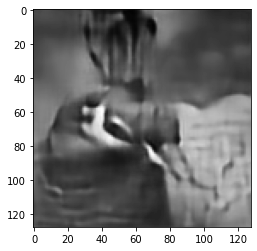

In [ ]:
display_img(image2[0])

In [ ]:
gallery_data.shape

(550, 128, 128, 1)

In [ ]:
gallery_features = feature_extraction(model, gallery_data, layer = 7)
query_features = feature_extraction(model, query_data, layer = 7)

In [ ]:
gallery_features = gallery_features.reshape(gallery_features.shape[0], gallery_features.shape[1]*gallery_features.shape[2]*gallery_features.shape[3])
query_features = query_features.reshape(query_features.shape[0], query_features.shape[1]*query_features.shape[2]*query_features.shape[3])

In [ ]:
print(gallery_features.shape)
print(query_features.shape)

(550, 32768)
(100, 32768)


In [ ]:
query_features[0]
query_label[0]

'/content/drive/MyDrive/dataset/validation/query/n03793489(mouse)/n03793489_54626.JPEG'

In [ ]:
### metric part ### va fatta su flatten

In [ ]:
def load_image3(file_path):
  img = tf.keras.utils.load_img(file_path, color_mode='grayscale', target_size=(128,128), interpolation='nearest')
  img = tf.keras.utils.img_to_array(img)
  img /=255
  return img

In [ ]:
pairwise_dist = scipy.spatial.distance.cdist(query_features, gallery_features, 'cosine')

In [ ]:
pairwise_dist[0][2]

2.847260359516236

In [ ]:
indices = np.argsort(pairwise_dist, axis=-1)

In [ ]:
indices.shape

(100, 550)

In [ ]:
indices[0][:8]

array([ 24,  16,  46, 341,  65, 371, 546,  49])

In [ ]:
def k_nn(query_num, k):
  print(query_label[query_num])
  immagine = load_image3(query_label[query_num])
  plt.imshow(immagine[:,:,0], cmap='gray')

  fig = plt.figure(figsize=(25,10))
  for i, match in enumerate(indices[query_num][:k]):
    print(gallery_label[match])
    nn = load_image3(gallery_label[match])
    fig.add_subplot(1,len(indices[query_num][:k]),i+1)
    plt.imshow(nn[:,:,0], cmap='gray')


/content/drive/MyDrive/dataset/validation/query/n01944390(snail)/n01944390_1105.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01944390(snail)/n01944390_1659.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01944390(snail)/n01944390_14024.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01806143(peacock)/n01806143_4065.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01644900(tailed_frog)/n01644900_20405.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01632777(axolotl)/n01632777_15593.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01944390(snail)/n01944390_34043.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01669191(box_turtle)/n01669191_7859.JPEG
/content/drive/MyDrive/dataset/validation/gallery/n01644900(tailed_frog)/n01644900_7903.JPEG


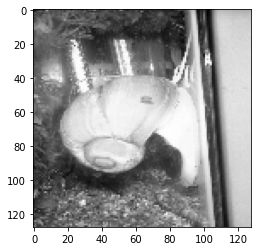

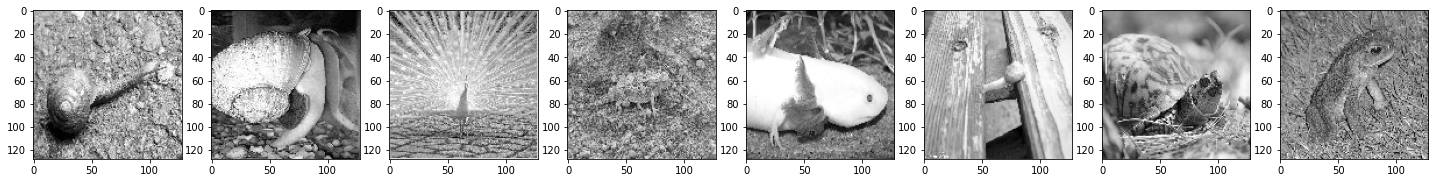

In [ ]:
k_nn(32,8)

In [ ]:
#### COARSE EVALUATION ###

In [ ]:
goldfish = 'goldfish'
axolotl = 'axolotl'
ostrich = 'ostrich'
terrier = 'terrier' 
frog = 'frog'
turtle = 'turtle'
peacock = 'peacock'
snail = 'snail'
sea_lion = 'sea_lion'
mouse = 'mouse'


    

def evaluation(query_num, k):
  count = 0

  if goldfish in query_label[query_num]:
    class_name = 'goldfish'
  if axolotl in query_label[query_num]:
    class_name = 'axolotl'
  if ostrich in query_label[query_num]:
    class_name = 'ostrich'
  if terrier in query_label[query_num]:
    class_name = 'terrier'
  if frog in query_label[query_num]:
    class_name = 'frog'
  if turtle in query_label[query_num]:
    class_name = 'turtle'
  if peacock in query_label[query_num]:
    class_name = 'peacock'
  if snail in query_label[query_num]:
    class_name = 'snail'
  if sea_lion in query_label[query_num]:
    class_name = 'sea_lion'
  if mouse in query_label[query_num]:
    class_name = 'mouse'

  for match in indices[query_num][:k]:
    if class_name in gallery_label[match]:
        count += 1
  return count


In [ ]:
len(query_label)

100

In [ ]:
n_neigh = 10
correct = 0
for i in range(len(query_label)):
  correct += evaluation(i, n_neigh)

accuracy = correct/(n_neigh*len(query_label))

print(accuracy)
print(correct)


0.177
177
